In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [2]:
#loading the data
df=pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET (1).csv")

In [3]:
#the first five rows of data
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
#missing values
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
#Convert the 'FullDate' column to datetime and setting the  column as index
df["FullDate"] = pd.to_datetime(df["FullDate"]) #convert column to datetime
df.set_index("FullDate", inplace=True)

Text(0.5, 1.0, 'ElecPrice over time')

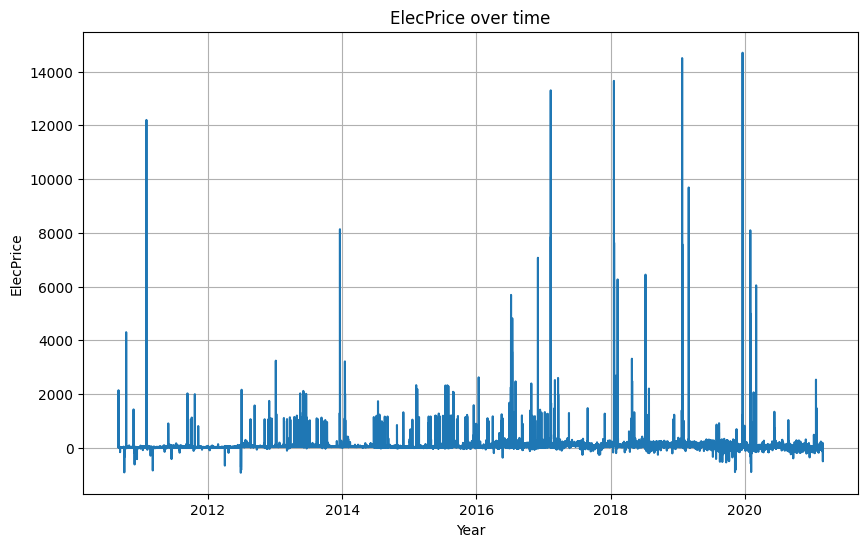

In [7]:
#visualizing the time series
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice)
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over time')


In [8]:
#Upsample to daily data points
df_daily = df.resample('D').sum()

Text(0.5, 1.0, 'ElecPrice over time (daily)')

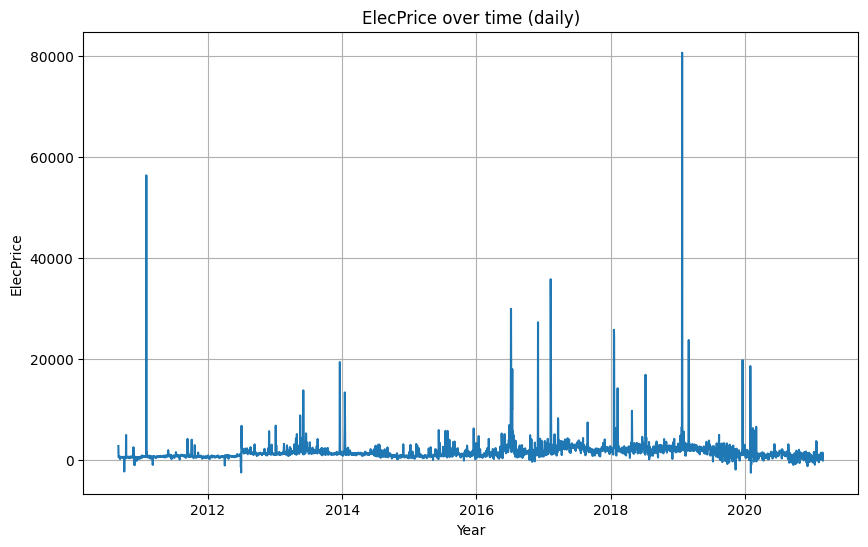

In [9]:
#visualizing time series after upsampling to daily data points
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over time (daily)')

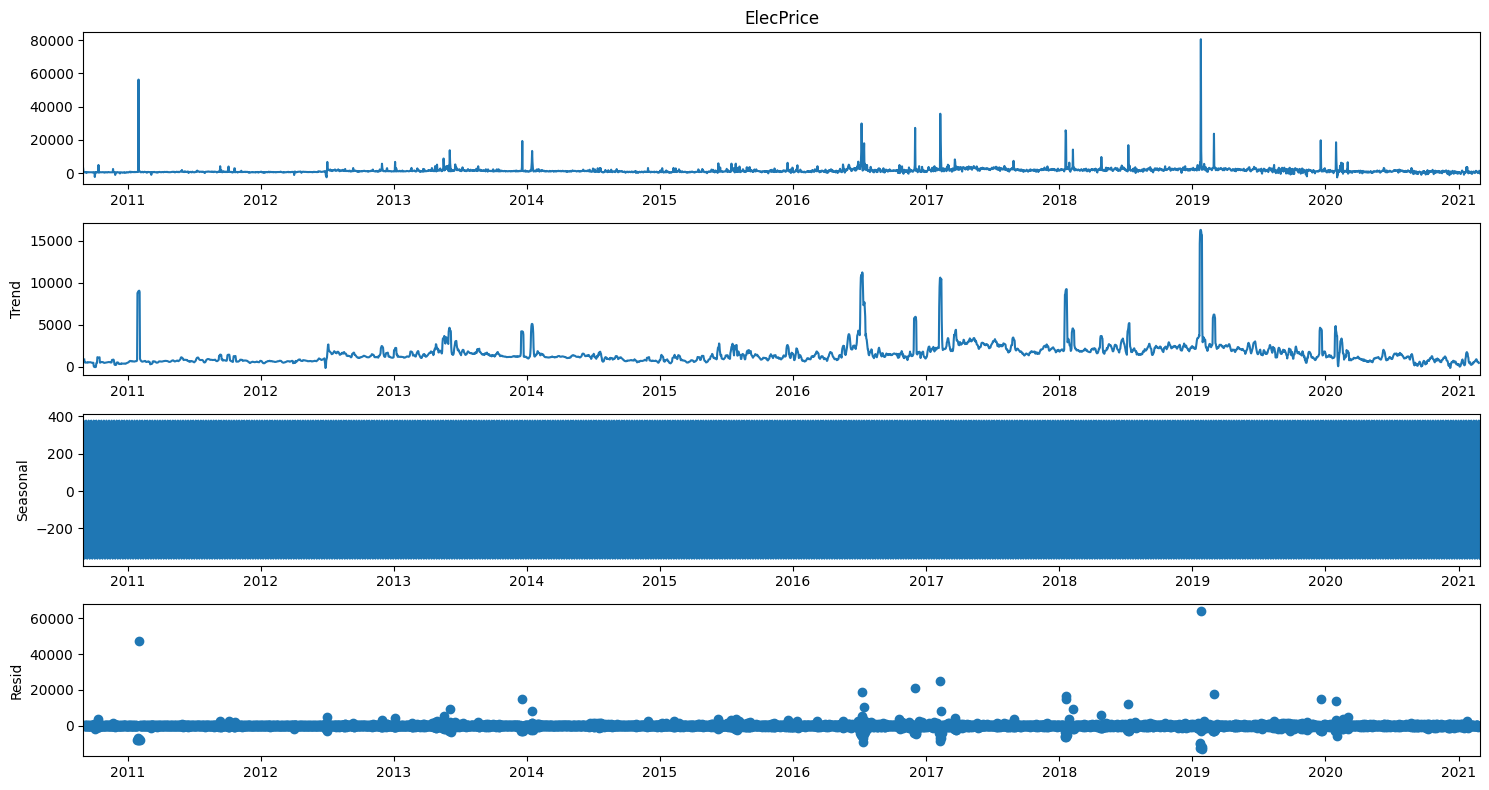

In [10]:
#components of thhe time series
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df_daily[ 'ElecPrice' ], model= 'additive' )
decompose_series.plot()
plt.show()


Statisitcs of sysload

In [11]:
adf_result_sysload = adfuller(df_daily[ 'SysLoad' ])
print(f'ADF Statistic: {round(adf_result_sysload[ 0 ],6)}')
print(f'p-value: {round(adf_result_sysload[ 1 ],6)}')
print(f'No. of lags used: {round(adf_result_sysload[ 2 ],6)}')
print(f'No. of observations used : {round(adf_result_sysload[ 3 ],6)}')
print('Critical Values:')
for k, v in adf_result_sysload[ 4 ].items():
 print( f' {k} : {round(v,6)} ' )

ADF Statistic: -3.690159
p-value: 0.004254
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1% : -3.432071 
 5% : -2.8623 
 10% : -2.567175 


Statistics of gas price

In [12]:
adf_result_gas = adfuller(df_daily[ 'GasPrice' ])
print(f'ADF Statistic: {round(adf_result_gas[ 0 ],6)}')
print(f'p-value: {round(adf_result_gas[ 1 ],6)}')
print(f'No. of lags used: {round(adf_result_gas[ 2 ],6)}')
print(f'No. of observations used : {round(adf_result_gas[ 3 ],6)}')
print('Critical Values:')
for k, v in adf_result_gas[ 4 ].items():
 print( f' {k} : {round(v,4)} ' )

ADF Statistic: -2.902767
p-value: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


Statistics of ElecPrice

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'ElecPrice' ])
print(f'ADF Statistic: {round(adf_result[ 0 ],4)}')
print(f'p-value: {round(adf_result[ 1 ],4)}')
print(f'No. of lags used: {round(adf_result[ 2 ],4)}')
print(f'No. of observations used : {round(adf_result[ 3 ],4)}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {round(v,4)} ' )


ADF Statistic: -8.2691
p-value: 0.0
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


Splitting the data into test and train

In [14]:
#Split the dataset
df_train = df_daily.iloc[:2757,:]
df_test = df_daily.iloc[2757:,:]

In [15]:
#creating a new dataframe with Fulltime as 'ds' and ElecPrice as 'y'
data_prophet = pd.DataFrame({'ds': df_train.index, 'y': df_train.ElecPrice})

In [16]:
data_prophet

,ds,y
FullDate,,
2010-09-01,2010-09-01,2751.700
2010-09-02,2010-09-02,570.810
2010-09-03,2010-09-03,504.975
2010-09-04,2010-09-04,502.275
2010-09-05,2010-09-05,500.555
...,...,...
2018-03-15,2018-03-15,2717.340
2018-03-16,2018-03-16,2277.335
2018-03-17,2018-03-17,1718.385


In [17]:
#importing prophet model
from prophet import Prophet

#creating an instance of and fitting the model
model = Prophet()
model.fit(data_prophet)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/v1rmj5lh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/ycidnbps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16605', 'data', 'file=/tmp/tmpj002epaz/v1rmj5lh.json', 'init=/tmp/tmpj002epaz/ycidnbps.json', 'output', 'file=/tmp/tmpj002epaz/prophet_modelsf6xcgx0/prophet_model-20230801144159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
#creating periods of len(df_test) for prediction
future = model.make_future_dataframe(periods=len(df_test))
future


,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [19]:
#prediction
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,1010.313230,-1403.457217,3280.293427,863.835947,863.835947,863.835947
1,2010-09-02,1090.380022,-1167.808603,3657.270043,863.700334,863.700334,863.700334
2,2010-09-03,864.952054,-1475.301053,3226.016907,863.564720,863.564720,863.564720
3,2010-09-04,524.183507,-1774.909391,2727.416969,863.429107,863.429107,863.429107
4,2010-09-05,433.902599,-1870.099752,2745.876037,863.293494,863.293494,863.293494
...,...,...,...,...,...,...,...
3829,2021-02-24,3439.324579,433.088490,6386.044175,3532.982694,1771.861906,5240.329591
3830,2021-02-25,3506.343399,275.825159,6559.130263,3533.774169,1768.505835,5244.783517
3831,2021-02-26,3273.143175,294.137261,6153.619605,3534.565643,1765.149764,5247.659810
3832,2021-02-27,2929.735061,-224.743980,5852.497453,3535.357117,1762.072179,5250.536104


In [20]:
#extracting the forecast
forecast_values = forecast['yhat'].tail(len(df_test))
forecast_values

2757    2527.245268
2758    2680.619886
2759    2779.709354
2760    2571.766082
2761    2246.849943
           ...     
3829    3439.324579
3830    3506.343399
3831    3273.143175
3832    2929.735061
3833    2841.739923
Name: yhat, Length: 1077, dtype: float64

In [21]:
# Defining the MAPE function
def mape(y, yhat):
  #y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [22]:
mape(df_test['ElecPrice'].values, forecast_values.values)

544.09

In [23]:
#calculating mean square error
error = mean_squared_error(df_test['ElecPrice'], forecast_values)
round(np.sqrt(error), 2)

3207.46

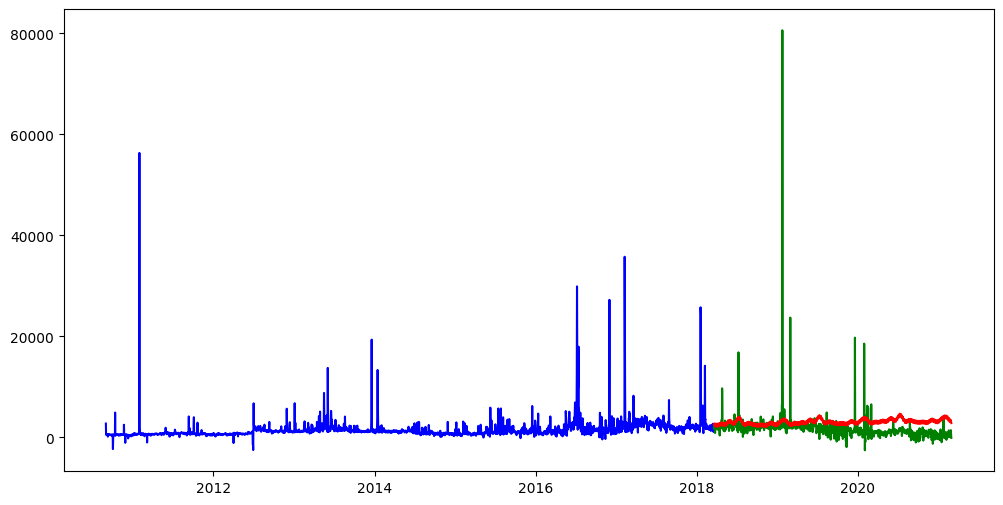

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df_train.index, df_train['ElecPrice'], label ='training data', color = 'blue')
plt.plot(df_test.index, df_test['ElecPrice'], label ='testing data', color = 'green')
plt.plot(df_test.index, forecast_values, label ='Forecasted data', color = 'red')

In [25]:
df_train.index

DatetimeIndex(['2010-09-01', '2010-09-02', '2010-09-03', '2010-09-04',
               '2010-09-05', '2010-09-06', '2010-09-07', '2010-09-08',
               '2010-09-09', '2010-09-10',
               ...
               '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19'],
              dtype='datetime64[ns]', name='FullDate', length=2757, freq='D')

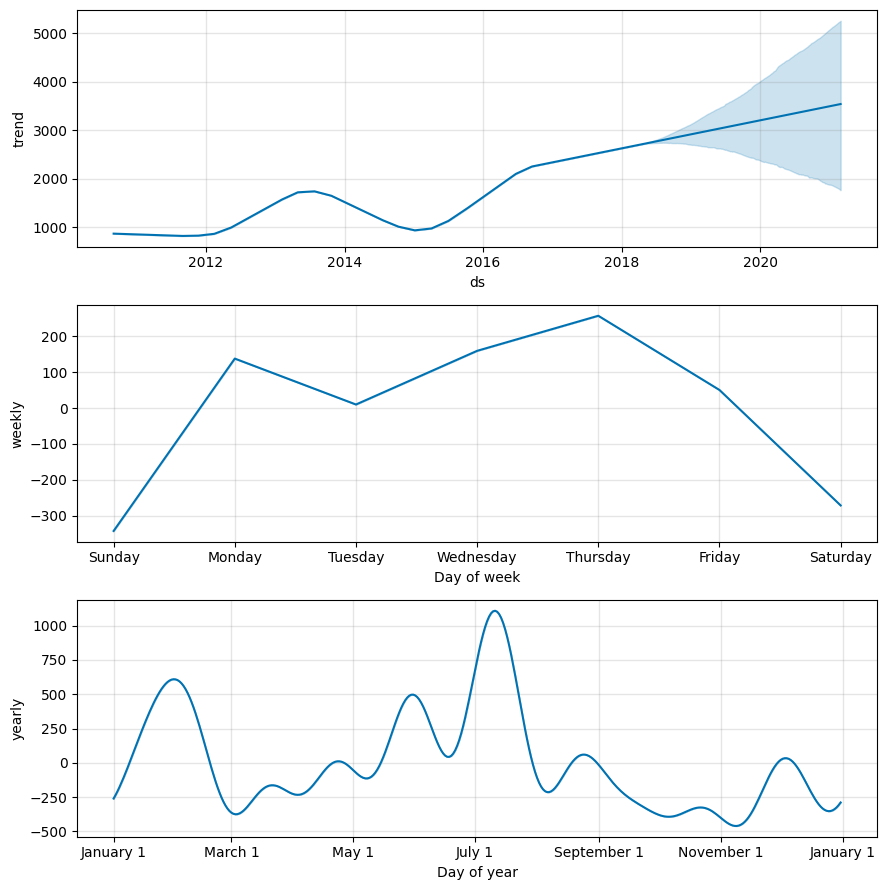

In [26]:
model.plot_components(forecast)
plt.show()

Adding regressors to Prophet model

In [27]:
#resetting index
df_regressor = df_daily.reset_index()

In [28]:
df_regressor.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [29]:
#renaming the columns
regressor_df = df_regressor.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" , "ElecPrice": "y", "FullDate" : "ds"})
regressor_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [30]:
#creating ann instance of the model
model_2 = Prophet()

In [31]:
#adding regressors to model
model_2.add_regressor('add1')
model_2.add_regressor('add2')
model_2.add_regressor('add3')

In [32]:
#Split the dataset
df_train_regressor = regressor_df.iloc[:2757,:]
df_test_regressor = regressor_df.iloc[2757:,:]

In [33]:
#fitting model_2
model_2.fit(df_train_regressor)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/4d9ptxwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/qezqc925.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65488', 'data', 'file=/tmp/tmpj002epaz/4d9ptxwz.json', 'init=/tmp/tmpj002epaz/qezqc925.json', 'output', 'file=/tmp/tmpj002epaz/prophet_modelf70xagq9/prophet_model-20230801144202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
df_test_regressor.head(2)

,ds,add2,add1,add3,y
2757,2018-03-20,540.0,7696.91130,201.588,1833.00
2758,2018-03-21,571.2,4658.05865,203.256,1730.49


In [35]:
#forecasting
future_2 = model_2.make_future_dataframe(periods=len(df_test_regressor))
future_2.head(2)


,ds
0,2010-09-01
1,2010-09-02


In [36]:
forecast_2 = model_2.predict(df_test_regressor)
forecast_2.head()
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1986.140088,-190.131383,4231.016118,1865.204282,1865.204282,1865.204282
1,2018-03-21,1977.544546,-311.702570,4148.786439,1865.891589,1865.891589,1865.891589
2,2018-03-22,2897.701501,579.895060,5141.319501,1866.578897,1866.578897,1866.578897
3,2018-03-23,2581.863394,315.123125,4784.784545,1867.266204,1867.266204,1867.266204
4,2018-03-24,1434.816566,-903.037177,3682.248527,1867.953512,1867.953512,1867.953512
...,...,...,...,...,...,...,...
1072,2021-02-24,954.521071,-1306.314769,3230.229460,2601.997966,1862.275797,3379.179402
1073,2021-02-25,1314.072916,-1067.364021,3617.993784,2602.685274,1862.402012,3380.866575
1074,2021-02-26,1377.886784,-987.861429,3786.216435,2603.372581,1862.528227,3382.553748
1075,2021-02-27,1032.792721,-1239.658963,3335.395652,2604.059889,1862.654443,3384.240921


In [37]:
forecast_values_2 = forecast_2['yhat'].tail(len(df_test_regressor))
forecast_values_2

0       1986.140088
1       1977.544546
2       2897.701501
3       2581.863394
4       1434.816566
           ...     
1072     954.521071
1073    1314.072916
1074    1377.886784
1075    1032.792721
1076    1193.248672
Name: yhat, Length: 1077, dtype: float64

In [38]:
#MAPE
mape(df_test['ElecPrice'].values, forecast_values_2.values)

231.48

In [39]:
#mean square error
error_2 = mean_squared_error(df_test_regressor['y'], forecast_values_2)
np.sqrt(error_2)

2707.156776728795

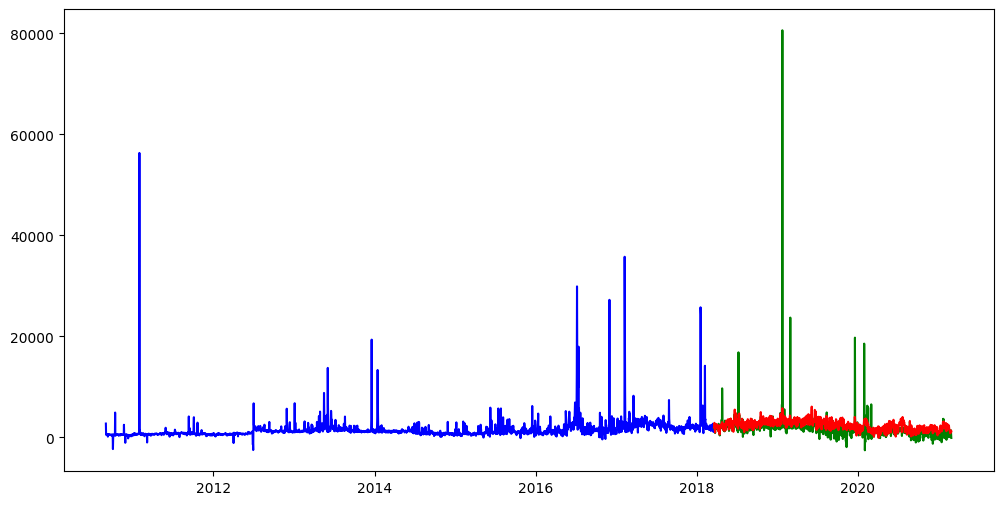

In [40]:
plt.figure(figsize = (12,6))
plt.plot(df_train.index, df_train_regressor['y'], label ='training data', color = 'blue')
plt.plot(df_test.index, df_test_regressor['y'], label ='testing data', color = 'green')
plt.plot(df_test.index, forecast_values_2, label ='Forecasted data', color = 'red')

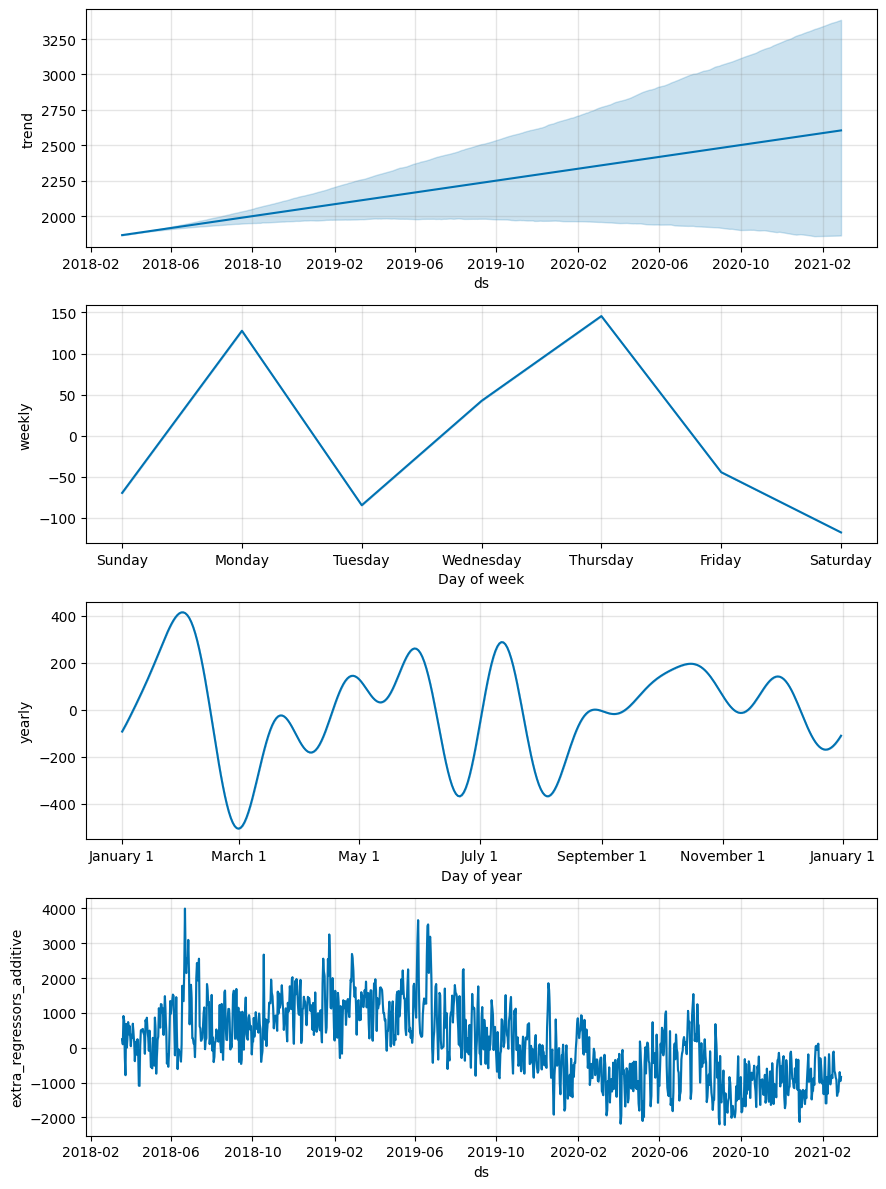

In [41]:
model_2.plot_components(forecast_2)
plt.show()

Dropping Tmax

In [42]:
#Creating another dataframe by removing Tmax
df_daily_2 = df_daily.drop('Tmax', axis = 1)

In [43]:
df_daily_2.head(2)

,SysLoad,GasPrice,ElecPrice
FullDate,,,
2010-09-01,41565.38,88.56,2751.70
2010-09-02,38898.99,88.56,570.81


In [44]:
df_daily_2 = df_daily_2.rename(columns={"ElecPrice": "y", "FullDate" : "ds"})


In [45]:
#Split the dataset
df_train_2 = df_daily_2.iloc[:2757,:]
df_test_2 = df_daily_2.iloc[2757:,:]

In [46]:
#creating an instance of prophet
model_3 = Prophet()

In [47]:
#adding regressors
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [48]:
#fitting the model
model_3.fit(df_train_regressor)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/_40ks2zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj002epaz/amb9skkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41373', 'data', 'file=/tmp/tmpj002epaz/_40ks2zx.json', 'init=/tmp/tmpj002epaz/amb9skkh.json', 'output', 'file=/tmp/tmpj002epaz/prophet_modelkpg3w1l1/prophet_model-20230801144204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
forecast_3 = model_3.predict(df_test_regressor)
forecast_3.head()
forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1987.399137,-213.885347,4244.987443,1867.898511,1867.898511,1867.898511
1,2018-03-21,1978.764781,-344.141478,4261.008138,1868.587404,1868.587404,1868.587404
2,2018-03-22,2898.579564,617.049982,5208.658393,1869.276296,1869.276296,1869.276296
3,2018-03-23,2583.369853,504.918811,4681.472901,1869.965189,1869.965189,1869.965189
4,2018-03-24,1436.029300,-851.248458,3530.564334,1870.654081,1870.654081,1870.654081
...,...,...,...,...,...,...,...
1072,2021-02-24,957.664760,-1380.342579,3301.774929,2606.391281,1871.944649,3336.948202
1073,2021-02-25,1316.862372,-1092.111358,3648.503588,2607.080173,1871.817600,3338.744933
1074,2021-02-26,1381.438186,-755.115581,3642.303923,2607.769066,1871.712840,3341.367122
1075,2021-02-27,1036.019958,-1269.541121,3436.855248,2608.457958,1871.689101,3343.815862


In [50]:
forecast_values_3 = forecast_3['yhat'].tail(len(df_test_regressor))
forecast_values_3

0       1987.399137
1       1978.764781
2       2898.579564
3       2583.369853
4       1436.029300
           ...     
1072     957.664760
1073    1316.862372
1074    1381.438186
1075    1036.019958
1076    1197.210699
Name: yhat, Length: 1077, dtype: float64

In [51]:
round(mape(df_test_regressor['y'].values, forecast_values_3.values),2)

232.0